In [1]:
import numpy as np
import scipy 
import math
from libsvm.svmutil import *
import random
from datetime import datetime 

In [2]:
y_train, x_train = svm_read_problem('/home/samnel/meiliao/satimage.scale')
y_test, x_test = svm_read_problem('/home/samnel/meiliao/satimage.scale.t')

In [3]:
def chage_y(y,changey):
    new_y = []
    for i in range(len(y)):
        if y[i] == changey :
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y

In [4]:
#Q9
C = [0.1, 1, 10]
Q = [2, 3, 4]

four_y_train = chage_y(y_train, 4)
four_y_test = chage_y(y_test, 4)

small_C = 0
small_Q = 0
small_sv = math.inf

for i in C:
    for j in Q:
        m = svm_train(four_y_train,x_train,f'-t 1 -c {i} -d {j} -r 1 -g 1 -q')
        num_sv = m.get_nr_sv()
        p_label, p_acc, p_val = svm_predict(four_y_test , x_test, m)
        print(f"current_C = {i}, current_Q = {j}, current_sv = {num_sv}")
        if num_sv <= small_sv:
            small_sv = num_sv
            small_C = i
            small_Q = j


print(f"smallest_C = {small_C}, smallest_Q = {small_Q}, smallest_sv = {small_sv}")

Accuracy = 90.85% (1817/2000) (classification)
current_C = 0.1, current_Q = 2, current_sv = 859
Accuracy = 93.35% (1867/2000) (classification)
current_C = 0.1, current_Q = 3, current_sv = 790
Accuracy = 93.45% (1869/2000) (classification)
current_C = 0.1, current_Q = 4, current_sv = 740
Accuracy = 92.85% (1857/2000) (classification)
current_C = 1, current_Q = 2, current_sv = 783
Accuracy = 93.6% (1872/2000) (classification)
current_C = 1, current_Q = 3, current_sv = 721
Accuracy = 92% (1840/2000) (classification)
current_C = 1, current_Q = 4, current_sv = 666
Accuracy = 92.25% (1845/2000) (classification)
current_C = 10, current_Q = 2, current_sv = 711
Accuracy = 92% (1840/2000) (classification)
current_C = 10, current_Q = 3, current_sv = 660
Accuracy = 91.7% (1834/2000) (classification)
current_C = 10, current_Q = 4, current_sv = 629
smallest_C = 10, smallest_Q = 4, smallest_sv = 629


In [5]:
#Q10
C = [0.01, 0.1, 1, 10, 100]

one_y_train = chage_y(y_train, 1)
one_y_test = chage_y(y_test, 1)

small_C = 0
small_Eout = math.inf

for i in C:
    m = svm_train(one_y_train,x_train,f'-t 2 -c {i} -d 2 -g 1 -q')
    p_label, p_acc, p_val = svm_predict(one_y_test , x_test, m)
    Eout = 1 - 0.01*p_acc[0]
    print(f"current_C = {i}, current_Eout = {Eout}")
    if Eout <= small_Eout:
        small_Eout = Eout
        small_C = i

print(f"smallest_C = {small_C}, smallest_Eout = {small_Eout}")

Accuracy = 95.4% (1908/2000) (classification)
current_C = 0.01, current_Eout = 0.04600000000000004
Accuracy = 98.8% (1976/2000) (classification)
current_C = 0.1, current_Eout = 0.01200000000000001
Accuracy = 99.5% (1990/2000) (classification)
current_C = 1, current_Eout = 0.0050000000000000044
Accuracy = 99.4% (1988/2000) (classification)
current_C = 10, current_Eout = 0.005999999999999894
Accuracy = 99.45% (1989/2000) (classification)
current_C = 100, current_Eout = 0.005499999999999949
smallest_C = 1, smallest_Eout = 0.0050000000000000044


In [6]:
#Q11

import random
C = [0.01, 0.1, 1, 10, 100]
counter = [0]*5

for j in range(1000):
    
  max_acc = 0
  mingamma = 0
  
  validindex = random.sample(list(range(len(y_train))), 200)
  s = set(validindex)
  trainindex = [x for x in list(range(len(y_train))) if x not in s]
  
  x_training = [x_train[i] for i in trainindex]
  y_training = [y_train[i] for i in trainindex]
  one_y_train = chage_y(y_training, 1)
  
  x_val = [x_train[i] for i in validindex]
  y_val = [y_train[i] for i in validindex]
  one_y_val = chage_y(y_val, 1)
  
  
  for i in C:
    m = svm_train(one_y_train, x_training, f'-t 2 -c {i} -d 2 -g 1 -q')
    p_label, p_acc, p_val=svm_predict(one_y_val, x_val, m)
    if p_acc[0] > max_acc:
      max_acc = p_acc[0]
      mingamma = C.index(i)
  counter[mingamma] += 1


Accuracy = 97.5% (195/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 92.5% (185/200) (classification)
Accuracy = 98% (196/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 95.5% (191/200) (classification)
Accuracy = 98% (196/200) (classification)
Accuracy = 99.5% (199/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 95% (190/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 95.5% (191/200) (classification)
Accuracy = 98.5% (197/200) (classification)
Accuracy = 99% (198/200) (classification)
Accuracy

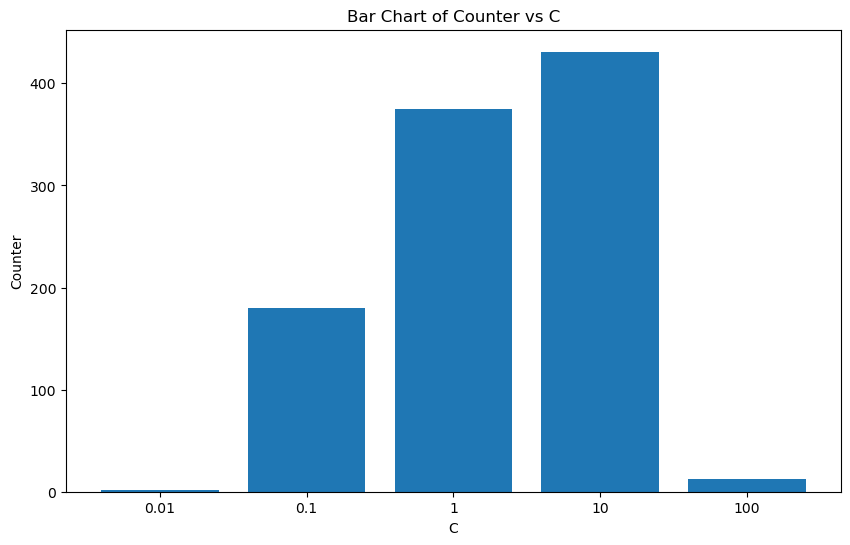

In [11]:
import matplotlib.pyplot as plt

# Given data
C = [0.01, 0.1, 1, 10, 100]
# Plotting a bar chart with specified C values on the x-axis

plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
plt.bar(range(len(C)), counter, tick_label=C)  # Using range(len(C)) for x-axis and setting tick labels as C values
plt.xlabel('C')
plt.ylabel('Counter')
plt.title('Bar Chart of Counter vs C')
plt.xticks(range(len(C)), C)  # Setting x-axis ticks to specific C values
plt.show()




In [13]:
#Q12
C = [0.01, 0.1, 1, 10, 100]

one_y_train = chage_y(y_train, 3)
one_y_test = chage_y(y_test, 3)
w_norms = []

for i in C:
    m = svm_train(one_y_train,x_train,f'-t 2 -c {i} -d 2 -g 1 -q')
    p_label, p_acc, p_val = svm_predict(one_y_test , x_test, m)
    
    sv_coef = m.get_sv_coef()
    SVs = m.get_SV()
    
    # 1. Determine the maximum feature index
    max_feature_index = max(max(sv.keys()) for sv in SVs)

    # 2. Transform sparse vectors to dense vectors
    dense_SVs = []
    for sv in SVs:
        # Initialize a dense vector with zeros
        dense_vector = np.zeros(max_feature_index)
        # Populate the dense vector with values from the sparse vector
        for idx, value in sv.items():
            dense_vector[idx - 1] = value  # Subtract 1 if the original indices start at 1
        dense_SVs.append(dense_vector)
        
    gamma = 1
    w = 0
    w_norm = 0
    
    for i in range(len(dense_SVs)):
        w += sv_coef[i][0] * dense_SVs[i]
    w_norm = np.dot(w,w)**0.5
    w_norms.append(w_norm)


Accuracy = 95.35% (1907/2000) (classification)
Accuracy = 95.85% (1917/2000) (classification)
Accuracy = 96.4% (1928/2000) (classification)
Accuracy = 95.95% (1919/2000) (classification)
Accuracy = 95.45% (1909/2000) (classification)


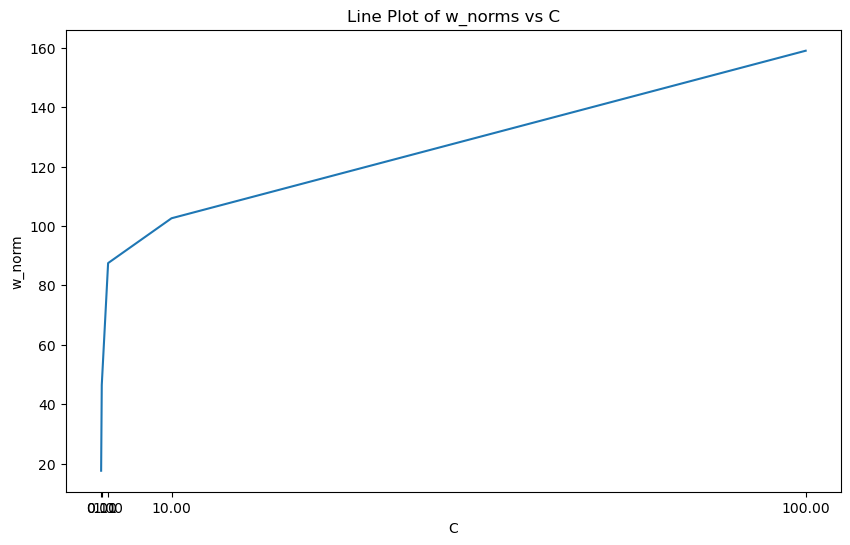

In [18]:
import matplotlib.pyplot as plt

# Given data
C = [0.01, 0.1, 1, 10, 100]

# Plotting a line chart
plt.figure(figsize=(10, 6))  # 設定圖表大小
plt.plot(C, w_norms)  # 繪製 w_norms 對 C 的折線圖
plt.xlabel('C')  # 設定 X 軸標籤
plt.ylabel('w_norm')  # 設定 Y 軸標籤
plt.title('Line Plot of w_norms vs C')  # 設定圖表標題
plt.xticks(C)  # 設定 X 軸刻度為 C 的值
plt.show()
